<a href="https://colab.research.google.com/github/hritikac25/Accenture_BreakthroughTech/blob/main/AccentureLocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import seaborn as sn
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import numpy as np
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#uploading our datasets to google colab
uploaded = files.upload()


In [ ]:
# remove/single out all columns except the city one

# remove duplicates from the city column

# remove duplicates into the us cities if any

# store the cities as a list/array/set

# loop through the accenture

#iterate through accenture cities

#remove duplicates from us cities and accenture cities


In [ ]:
df_fortune = pd.read_csv('/content/Clean Fortune 500.csv')

# change the PROFIT column to profit
df_fortune.rename(columns = {'PROFIT': 'profit'}, inplace = True)

# replace NaN with 0 for the profit column
df_fortune['profit'] = df_fortune['profit'].replace(np.nan, 0)

# df_fortune.head(10)


In [ ]:
print(df_fortune['profit'].isnull().sum())

0


In [ ]:
from tables import Column
#us_cities df
df_cities = pd.read_csv('/content/Clean U.S. cities.csv')

print("Dataframe shape: " + str(df_cities.shape))
# removing duplicates
df_cities.drop_duplicates
# adding the label/flag column
df_cities['flag'] = 0
# adding a new column for number of fortune 500 companies in the location, initializing their count to 0
df_cities['no_of_fortune_500'] = 0
# adding a new column for the sum of company profit, initializing their count to 0
df_cities['sum_fortune_profit'] = 0

Dataframe shape: (30409, 9)


In [ ]:
# change the unnamed column to city_name
df_cities.rename(columns = {'Unnamed: 0': 'city_name'}, inplace = True)
# print the df_cities
df_cities.head(5)

,city_name,state_name,county_name,lat,lng,population,density,ranking,zips,flag,no_of_fortune_500,sum_fortune_profit
0,New York,New York,Queens,40.6943,-73.9249,18680025,10768.0,1,11229 11228 11226 11225 11224 11222 11221 1122...,0,0,0
1,Los Angeles,California,Los Angeles,34.1141,-118.4068,12531334,3267.0,1,91367 90291 90293 90292 91316 91311 90035 9003...,0,0,0
2,Chicago,Illinois,Cook,41.8375,-87.6866,8586888,4576.0,1,60018 60649 60641 60640 60643 60642 60645 6064...,0,0,0
3,Miami,Florida,Miami-Dade,25.7840,-80.2101,6076316,4945.0,1,33128 33129 33125 33126 33127 33149 33144 3314...,0,0,0
4,Dallas,Texas,Dallas,32.7935,-96.7667,5910669,1522.0,1,75098 75287 75230 75231 75236 75237 75235 7525...,0,0,0


In [ ]:
df_acc_cities = pd.read_csv('/content/Clean Accenture Offices.csv')

# removing duplicates in the city column
df_acc_cities.City.drop_duplicates()
# print...
df_acc_cities.head(5)

,Location Name,City,Street Address 1,State/Province,Postal Code
0,Phoenix - Corporate office,Phoenix,101 N. 1st Avenue,Arizona,85003.0
1,Sacramento - Ice Blocks,Sacramento,1610 R Street,California,95811.0
2,San Francisco - Corporate office,San Francisco,415 Mission Street,California,94105.0
3,San Jose - Corporate office,San Jose,50 West San Fernando Street,California,95113.0
4,Seattle - Innovation Hub - Corporate,Seattle,1191 2nd Avenue,Washington,98101.0


In [ ]:
from numpy.lib.shape_base import row_stack
# Feature engineering
# changing the 'flag' to 1 for locations where accenture has offices
for city in df_acc_cities.City:
  df_cities.loc[df_cities.city_name == city,'flag'] = 1

# counting the number of fortune 500 companies in a city then changing the value to the count in our 'no_of_fortune_500' column
# create a dictionary for the df_fortune.CITY with cities as keys and frequency/count as the value
fortune500_dict = {}

for row in df_fortune.CITY:
  if row in fortune500_dict:
    fortune500_dict[row] += 1

  else:
    fortune500_dict[row] = 1

# print(fortune500_dict)

# now we put the values of the dictionary keys into our dataframe
list_cities = list(df_cities.city_name)
for city in list_cities:
  if city.upper() in fortune500_dict:
    df_cities.at[list_cities.index(city), 'no_of_fortune_500'] = fortune500_dict[city.upper()]


df_cities.head(5)


,city_name,state_name,county_name,lat,lng,population,density,ranking,zips,flag,no_of_fortune_500,sum_fortune_profit
0,New York,New York,Queens,40.6943,-73.9249,18680025,10768.0,1,11229 11228 11226 11225 11224 11222 11221 1122...,1,39,0
1,Los Angeles,California,Los Angeles,34.1141,-118.4068,12531334,3267.0,1,91367 90291 90293 90292 91316 91311 90035 9003...,1,3,0
2,Chicago,Illinois,Cook,41.8375,-87.6866,8586888,4576.0,1,60018 60649 60641 60640 60643 60642 60645 6064...,1,8,0
3,Miami,Florida,Miami-Dade,25.7840,-80.2101,6076316,4945.0,1,33128 33129 33125 33126 33127 33149 33144 3314...,1,3,0
4,Dallas,Texas,Dallas,32.7935,-96.7667,5910669,1522.0,1,75098 75287 75230 75231 75236 75237 75235 7525...,1,7,0


In [ ]:
# creating one data frame with the following columns:
# df_cities.city_name, df_cities.Flag, df_cities.population

# create new columns for fortune 500 profits and the number of fortune 500 comps in a location

# We'll do that by creating a copy of the existing us_cities df, removing other columns we won't be using,
# then adding the df_fortune.profit column to it.

# fortune 500 comps in a city
df = df_cities.copy()

df.drop(['county_name', 'lat', 'lng', 'ranking', 'zips'], axis = 1, inplace = True)

df.head(16)



,city_name,state_name,population,density,flag,no_of_fortune_500,sum_fortune_profit
0,New York,New York,18680025,10768.0,1,39,0
1,Los Angeles,California,12531334,3267.0,1,3,0
2,Chicago,Illinois,8586888,4576.0,1,8,0
3,Miami,Florida,6076316,4945.0,1,3,0
4,Dallas,Texas,5910669,1522.0,1,7,0
5,Houston,Texas,5724418,1394.0,1,10,0
6,Philadelphia,Pennsylvania,5540199,4544.0,1,4,0
7,Atlanta,Georgia,5151496,1419.0,1,13,0
8,Washington,District of Columbia,5066973,4434.0,1,2,0
9,Boston,Massachusetts,4465966,5505.0,1,3,0


In [ ]:
b= (0 or 1) and (1 and 1)
print(b)

1


In [ ]:
#removing cities with zero fortune500 companies:

df.drop(df[(df['no_of_fortune_500'] == 0)].index, inplace=True)

# print(df['no_of_fortune_500'])
# df.drop(['updated_no_of_fortune_500'], axis=1, inplace=True)
# print(df.columns)
# print(df[df['flag'] == 0])

In [ ]:
print("Dataframe shape: " + str(df.shape))

Dataframe shape: (209, 8)


In [ ]:
#total profits in a city

#calculating the sum of fortune500 profits in a city
fortune500_profit = {}
countt = 0
# rows_list = []

for city in df_fortune.CITY:

  if city in fortune500_profit:
      # city row index in the dataframe
      # indexx = df_fortune[city].index
      # print(indexx)
      fortune500_dict[city] += df_fortune.profit[countt]
      # print(df_fortune.profit[countt])

  else:
    fortune500_profit[city] = df_fortune.profit[countt]

  countt += 1


# now we put the values of the dictionary keys into our dataframe
list_cities = list(df_cities.city_name)
for city in list_cities:
  if city.upper() in fortune500_profit:
    df_cities.at[list_cities.index(city), 'sum_fortune_profit'] = fortune500_profit[city.upper()]





In [ ]:
# print(df_fortune.profit)
# df_fortune.dropna(inplace = True)
print(df_fortune['profit'].isnull().sum())
# print(df_fortune['profit'])

0


In [ ]:
df.columns

Index(['city_name', 'state_name', 'population', 'density', 'flag',
       'no_of_fortune_500', 'sum_fortune_profit', 'Predicted_Flag'],
      dtype='object')

In [ ]:
# Machine Learning

# # Logistic Regression
# logr = sklearn.linear_model.LogisticRegression()

#X and Y labels for our model
y = df['flag']
X = df.drop(['flag', 'city_name', 'state_name', 'Predicted_Flag'], axis = 1)
# print(X.head(5))

# Creating train, test and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.50, random_state = 1234)

print(X_train.shape)
print(X_test.shape)


'''
Fit a Logistic Regression classifier to the training data X_train, y_train.
Return the loss and accuracy of resulting predictions on the test set.
Parameters:
    C = Factor that controls how much regularization is applied to the model.
'''
  # 1. Create the  scikit-learn LogisticRegression model object below and assign to variable 'model'
model = sklearn.linear_model.LogisticRegression()

# 2. Fit the model to the training data below

model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the result to the
# variable 'probability_predictions' below


probability_predictions = model.predict_proba(X_test)

# 4. Compute the log loss on 'probability_predictions' and save the result to the variable 'l_loss' below
l_loss = log_loss(y_test, probability_predictions)

# 5. Make predictions on the test data using the predict() method and assign the result to the
# variable 'class_label_predictions' below
class_label_predictions = model.predict(X_test)

# 6. Compute the accuracy score on 'class_label_predictions' and save the result to the variable 'acc_score' below
acc_score = accuracy_score(y_test, class_label_predictions)




(104, 4)
(105, 4)


In [ ]:
# Predicted values:
print("Predicted Flag:")
print(class_label_predictions.dtype)

# df['Predicted_Flag'] = pd.dataframe(class_label_predictions)
df['Predicted_Flag'] = pd.DataFrame (class_label_predictions, columns = ['predicted_flag'])

# print(df.shape())

print(df[df['Predicted_Flag'] == 1])

# Jacksonville, Florida. Fort Worth, Texas. Wichita, Kansas

Predicted Flag:
int64
        city_name     state_name  population  density  flag  \
0        New York       New York    18680025  10768.0     1   
2         Chicago       Illinois     8586888   4576.0     1   
9          Boston  Massachusetts     4465966   5505.0     1   
12  San Francisco     California     3557982   7199.0     1   
25    San Antonio          Texas     2036324   1183.0     1   
43   Jacksonville        Florida     1165107    466.0     0   
55     Fort Worth          Texas      892221    992.0     0   
92        Wichita         Kansas      484715    930.0     0   
95    Little Rock       Arkansas      446814    637.0     0   

    no_of_fortune_500  sum_fortune_profit  Predicted_Flag  
0                  39                   0             1.0  
2                   8                   0             1.0  
9                   3                   0             1.0  
12                  6                   0             1.0  
25                  4                   0      

In [ ]:
print('Log loss: ' + str(l_loss))
print('Accuracy Score: ' + str(acc_score))

Log loss: 0.4783573133311523
Accuracy Score: 0.8666666666666667


In [ ]:
print(df[df['no_of_fortune_500'] > 5])

         city_name  state_name  population  density  flag  no_of_fortune_500  \
0         New York    New York    18680025  10768.0     1                 39   
2          Chicago    Illinois     8586888   4576.0     1                  8   
4           Dallas       Texas     5910669   1522.0     1                  7   
5          Houston       Texas     5724418   1394.0     1                 10   
7          Atlanta     Georgia     5151496   1419.0     1                 13   
12   San Francisco  California     3557982   7199.0     1                  6   
13         Seattle  Washington     3530752   3414.0     1                  6   
15     Minneapolis   Minnesota     2885614   3035.0     1                  6   
34      Cincinnati        Ohio     1684800   1501.0     1                  6   
37        Columbus        Ohio     1547862   1560.0     1                  6   
979         McLean    Virginia       48566    756.0     0                  6   

     sum_fortune_profit  Predicted_Flag

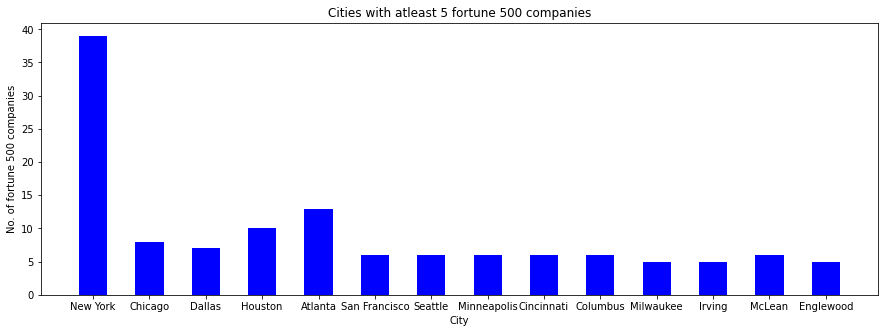

In [ ]:
# Insights

# cities with more than 10 fortune 500 companies
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(df[df['no_of_fortune_500'] >= 5]['city_name'], df[df['no_of_fortune_500'] >= 5]['no_of_fortune_500'], color ='blue',
        width = 0.5)

plt.xlabel("City")
plt.ylabel("No. of fortune 500 companies")
plt.title("Cities with atleast 5 fortune 500 companies")
plt.show()